In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import soundfile as sf
import IPython.display as ipd

In [5]:
def my_rqa(features1, features_ref, sim=None):
    # calc and plor RQA
    
    # calc similarity
    if sim is None:
        sim = librosa.segment.cross_similarity(features1, features_ref, 
                                            mode='affinity',
                                            metric='cosine')
    # New gaps cost 5, extending old gaps cost 10 for each step
    score, path = librosa.sequence.rqa(sim, 5, 10)
    best_score = score.max()

    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    librosa.display.specshow(sim, x_axis='frames', y_axis='frames')
    plt.title('Similarity matrix')
    plt.colorbar()
    plt.subplot(1,2,2)
    librosa.display.specshow(score, x_axis='frames', y_axis='frames')
    plt.title(f'Alignment score matrix ({best_score})')
    plt.plot(path[:, 1], path[:, 0], label='Optimal path', color='c')
    plt.colorbar()
    plt.legend()
    plt.show()
    return best_score, score, path, sim

In [3]:
fname1 = '../data/music-from-youtube/Taylor Swift - Blank Space-e-ORhEE9VVg/Taylor Swift - Blank Space-e-ORhEE9VVg.webm.mp3'
y1, sr1 = librosa.load(fname1, duration=120)

fname2 = '../data/music-from-youtube/Taylor Swift - Style--CmadmM5cOk/Taylor Swift - Style--CmadmM5cOk.webm.mp3'
y2, sr2 = librosa.load(fname2, duration=120)

# Use time-delay embedding to reduce noise
chroma_cqt1 = librosa.feature.chroma_cqt(y=y1, sr=sr1)
chroma_stack1 = librosa.feature.stack_memory(chroma_cqt1, n_steps=3)
chroma_cqt2 = librosa.feature.chroma_cqt(y=y2, sr=sr2)
chroma_stack2 = librosa.feature.stack_memory(chroma_cqt2, n_steps=3)

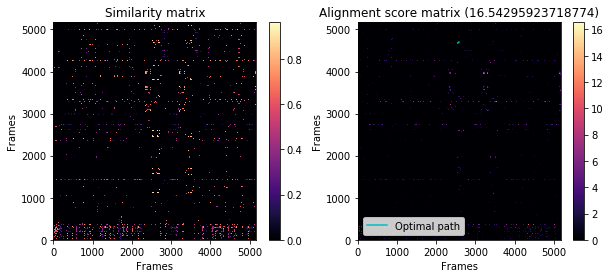

In [6]:
res = my_rqa(chroma_stack1, chroma_stack2)


In [8]:
path=res[2]
path

array([[4679, 2549],
       [4680, 2550],
       [4681, 2551],
       [4682, 2552],
       [4683, 2553],
       [4684, 2555],
       [4685, 2556],
       [4686, 2557],
       [4687, 2558],
       [4688, 2560],
       [4689, 2562],
       [4690, 2564],
       [4691, 2565],
       [4692, 2566],
       [4693, 2568],
       [4694, 2570],
       [4695, 2571],
       [4696, 2572],
       [4697, 2573],
       [4698, 2574],
       [4699, 2576],
       [4700, 2578]], dtype=uint64)

In [9]:
librosa.frames_to_time(path,sr=sr)

array([[108.6461678 ,  59.1876644 ],
       [108.66938776,  59.21088435],
       [108.69260771,  59.23410431],
       [108.71582766,  59.25732426],
       [108.73904762,  59.28054422],
       [108.76226757,  59.32698413],
       [108.78548753,  59.35020408],
       [108.80870748,  59.37342404],
       [108.83192744,  59.39664399],
       [108.85514739,  59.4430839 ],
       [108.87836735,  59.48952381],
       [108.9015873 ,  59.53596372],
       [108.92480726,  59.55918367],
       [108.94802721,  59.58240363],
       [108.97124717,  59.62884354],
       [108.99446712,  59.67528345],
       [109.01768707,  59.6985034 ],
       [109.04090703,  59.72172336],
       [109.06412698,  59.74494331],
       [109.08734694,  59.76816327],
       [109.11056689,  59.81460317],
       [109.13378685,  59.86104308]])